In [2]:
import pandas as pd
import numpy as np
import pickle 

In [3]:
#flpk_transformed = pd.read_csv(r"C:/Users/anuja/Downloads/Anuja/Sem_3/Intro to Intelligent Systems/IIS project/Flipkart-sentiment-analysis/flpk_transformed.csv")
flpk_transformed = pd.read_csv("flpk_transformed.csv")

In [4]:
flpk_transformed.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes 12 l roompersonal air coolerwhite black...,3999,5,super,great cooler excellent air flow and for this p...,positive
1,candes 12 l roompersonal air coolerwhite black...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,candes 12 l roompersonal air coolerwhite black...,3999,3,fair,the quality is good but the power of air is de...,positive
3,candes 12 l roompersonal air coolerwhite black...,3999,1,useless product,very bad product its a only a fan,negative
4,candes 12 l roompersonal air coolerwhite black...,3999,3,fair,ok ok product,neutral


In [5]:
from sklearn.preprocessing import LabelEncoder

# apply label encoding to the sentiment column
encoder = LabelEncoder()
flpk_transformed['sentiment_encoded'] = encoder.fit_transform(flpk_transformed['Sentiment'])

In [6]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

We know that we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

In [7]:
# replacement_value = 'N/A'
# flpk_transformed["Review"] = flpk_transformed["Review"].str.strip().replace('', replacement_value)

nan_mask = flpk_transformed["Review"].isna()

# Use the boolean mask to filter rows with NaN values
rows_with_nan = flpk_transformed[nan_mask]

# Print the rows with NaN values
print(rows_with_nan)

Empty DataFrame
Columns: [product_name, product_price, Rate, Review, Summary, Sentiment, sentiment_encoded]
Index: []


In [8]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
fltk_reviews_corpus = vectorizer.fit_transform(flpk_transformed.Review)
fltk_reviews_corpus.shape

(205031, 5326)

In [9]:
#dependent feature
sentiment = flpk_transformed['sentiment_encoded']
sentiment.shape

(205031,)

In [10]:
#split the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(fltk_reviews_corpus,sentiment,test_size=0.33,random_state=40)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (137370, 5326) (137370,)
Test data shape  (67661, 5326) (67661,)


# Apply Multinomial Naive Bayes

Multinomial Naive Bayes is useful for determining the emotional tone of a piece of text, such as a tweet, product review, or customer feedbacks. The model works by computing the probability of each possible sentiment label (positive, negative, neutral) given a piece of text.

In [12]:
mb_clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = mb_clf.predict(X_test) #predict the sentiment for test data

print("Class Labels:", encoder.classes_)
print("Accuracy: %s" % str(mb_clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Class Labels: ['negative' 'neutral' 'positive']
Accuracy: 0.9010212677908987
Confusion Matrix
[[ 6588   608   711]
 [   50   202   210]
 [ 2596  2522 54174]]


In [14]:
pickle.dump(mb_clf,open("mb_model.pkl","wb"))

We achieved an accuracy of 90.10% by using NaiveBayes.

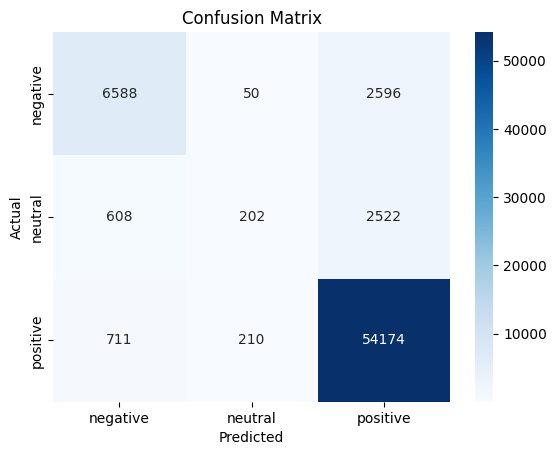

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      9234
           1       0.44      0.06      0.11      3332
           2       0.91      0.98      0.95     55095

    accuracy                           0.90     67661
   macro avg       0.73      0.59      0.61     67661
weighted avg       0.88      0.90      0.88     67661



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Assuming 'pred' and 'Y_test' are already defined

# Generate confusion matrix
conf_mat = confusion_matrix(Y_test, pred)

# Create a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print(classification_report(Y_test, pred))


Precision:

Precision is the ratio of true positive predictions to the total predicted positives. In the context of each class:
For class 0: 0.83, which means that among all instances predicted as class 0, 83% were actually class 0.
For class 1: 0.44, which means that among all instances predicted as class 1, 44% were actually class 1.
For class 2: 0.91, which means that among all instances predicted as class 2, 91% were actually class 2.


Recall:

Recall is the ratio of true positive predictions to the total actual positives. In the context of each class:
For class 0: 0.71, which means that among all instances that were actually class 0, 71% were correctly predicted as class 0.
For class 1: 0.06, which means that among all instances that were actually class 1, only 6% were correctly predicted as class 1.
For class 2: 0.98, which means that among all instances that were actually class 2, 98% were correctly predicted as class 2.


F1-Score:

The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates a good balance.
For class 0: 0.77
For class 1: 0.11
For class 2: 0.95


Support:

Support is the number of actual occurrences of the class in the specified dataset. In the context of each class:
For class 0: 9234 instances
For class 1: 3332 instances
For class 2: 55095 instances

Accuracy:

Overall accuracy of the model across all classes: 90%. This is the ratio of correctly predicted instances to the total instances.

Macro Avg:

The macro average is the average of the metrics (precision, recall, F1-score) across all classes. It provides equal weight to each class.

Weighted Avg:

The weighted average is the average of the metrics (precision, recall, F1-score) across all classes, weighted by the number of instances in each class. It gives more weight to classes with more instances.

# Apply Random Forest Classifier

In [15]:
#fit the model and predict the output

rf_clf = RandomForestClassifier().fit(X_train, Y_train)

pred = rf_clf.predict(X_test)

print("Accuracy: %s" % str(rf_clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 0.9104358493075775
Confusion Matrix
[[ 6903   604   610]
 [   33   249    36]
 [ 2298  2479 54449]]


In [16]:
pickle.dump(mb_clf,open("rf_model.pkl","wb"))

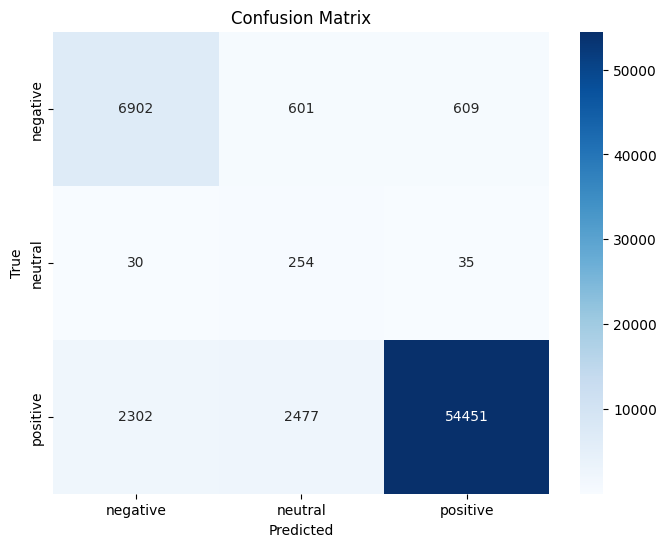

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the predicted labels 'pred' and true labels 'Y_test'
conf_matrix = confusion_matrix(pred, Y_test)

# Get class labels from encoder
class_labels = encoder.classes_

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


We achieved an accuracy of 91.05% by using Random Forest Classifier.

This shows that, once we transform our reviews into vectors using TfidfVectorizer and apply both NaiveBayes and RandomForestClassifier, RandomForestClassifier outperforms MultinomialNB. By using RandomForestClassifier without any parameter tuning, we attained an accuracy of 91.05% which is better than the MultinomialNB accuracy of 90.10%. However, we can still further improve our accuracy by tuning the parameters of our classifier using Hyper Parameter Tuning.

## Logistic Regression

Logistic Regression is a binary classification algorithm that can be extended to multi-class classification, which makes it suitable for sentiment analysis where the goal is to classify text into positive, negative, or neutral sentiments. As we are using scikit, by default it uses one vs rest approach.
In the OvR strategy, you train a separate binary logistic regression classifier for each class.

Positive vs. Rest:
A classifier is trained to distinguish Positive reviews from Negative and Neutral reviews.

Negative vs. Rest:
A classifier is trained to distinguish Negative reviews from Positive and Neutral reviews.

Neutral vs. Rest:
A classifier is trained to distinguish Neutral reviews from Positive and Negative reviews.

During prediction, you obtain the scores from each classifier, and the class with the highest score is chosen as the final prediction.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# vectorizer = CountVectorizer(stop_words='english')
# X = vectorizer.fit_transform(flpk_transformed['Review'])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, flpk_transformed['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
Logistic_model = LogisticRegression()
#Logistic_model.fit(X_train, y_train)
Logistic_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
Y_pred = Logistic_model.predict(X_test)

Logistic_accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy of Logistic Model is: {Logistic_accuracy}')

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))


Accuracy of Logistic Model is: 0.9083223718242415
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      9234
           1       0.74      0.06      0.11      3332
           2       0.92      0.99      0.95     55095

    accuracy                           0.91     67661
   macro avg       0.84      0.60      0.62     67661
weighted avg       0.90      0.91      0.89     67661

[[ 6827    17  2390]
 [  610   200  2522]
 [  612    52 54431]]


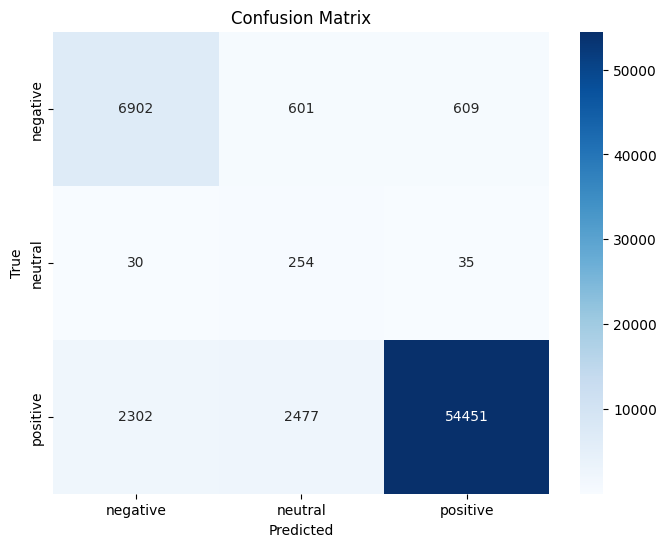

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the predicted labels 'pred' and true labels 'Y_test'
conf_matrix = confusion_matrix(pred, Y_test)

# Get class labels from encoder
class_labels = encoder.classes_

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# List of models and their accuracies
models = ['MultinomialNB', 'Random Forest', 'Logistic Regression', 'SVM']
accuracies = [accuracy_score(Y_test, pred), accuracy_score(Y_test, clf.predict(X_test)),
              Logistic_accuracy, SVM_accuracy]

# Plotting the bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy percentage
plt.show()


In [ ]:
## Not Working
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability estimates for the positive class
Y_prob = Logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## SVM

The basic idea behind SVM is to find a hyperplane that separates the data into different classes while maximizing the margin between the classes. SVM is robust, effective in high-dimensional spaces, and can handle both linear and non-linear decision boundaries through the use of appropriate kernels.

Support Vector Machines (SVM) is a supervised learning algorithm that can be used for classification or regression tasks. In the context of sentiment analysis, where the goal is to classify reviews into categories like Positive, Negative, and Neutral, SVM can be employed.

The SVM algorithm aims to find a hyperplane that best separates the data into different classes. In the case of sentiment analysis, the classes are Positive, Negative, and Neutral. The SVM algorithm tries to find a hyperplane that maximizes the margin between different classes.

SVM can use a kernel trick to transform the input features into a higher-dimensional space. This allows SVM to find a hyperplane that might not be linear in the original feature space but is linear in the transformed space. Common kernel functions include linear, polynomial, and radial basis function (RBF) kernels.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# X = flpk_transformed["Review"]
# y = flpk_transformed["Sentiment"]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# tfidf_vectorizer = TfidfVectorizer()
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) # Used to transform a raw-data into TF-IDF matrices
# X_test_tfidf = tfidf_vectorizer.transform(X_test) # Used to transform a raw-data into TF-IDF matrices

In [ ]:
svm_classifier = SVC(kernel='linear') # Used to create an instance of SVM with a linear kernel
svm_classifier.fit(X_train, Y_train) # It fits the above matrices obtained.

SVC(kernel='linear')

In [ ]:
Y_pred_svm = svm_classifier.predict(X_test)

SVM_accuracy = accuracy_score(Y_test, Y_pred_svm)
report = classification_report(Y_test, Y_pred_svm)

print(f"Accuracy of SVM is: {SVM_accuracy}")
print(report)

Accuracy of SVM is: 0.9087361995832163
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      9234
           1       0.72      0.07      0.12      3332
           2       0.92      0.99      0.95     55095

    accuracy                           0.91     67661
   macro avg       0.83      0.60      0.62     67661
weighted avg       0.90      0.91      0.89     67661



In [ ]:
## Not running
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probability estimates for the positive class
Y_prob = Logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## XGBoost

XGBoost is an ensemble learning algorithm that combines the predictions of multiple weak learners (typically decision trees) to create a stronger and more robust model.
It builds trees sequentially, with each tree attempting to correct the errors of the previous ones.

XGBoost has several hyperparameters that can be tuned to optimize performance. Common parameters include learning rate, maximum depth of trees, and the number of trees in the ensemble.

XGBoost uses a gradient boosting framework, where each tree corrects the errors of the previous one.
The algorithm minimizes a loss function, and each subsequent tree focuses on the examples that were misclassified by the previous ones.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train XGBoost model
XG_model = XGBClassifier()
XG_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_predicted_value = XG_model.predict(X_test)

# Evaluate the model
XG_accuracy = accuracy_score(Y_test, Y_predicted_value)
print(f'Accuracy of XGBoost is: {XG_accuracy}')

# Display classification report and confusion matrix
print(classification_report(Y_test, Y_predicted_value))
print(confusion_matrix(Y_test, Y_predicted_value))

Accuracy of XGBoost is: 0.9088396565229601
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      9234
           1       0.81      0.06      0.11      3332
           2       0.92      0.99      0.95     55095

    accuracy                           0.91     67661
   macro avg       0.86      0.60      0.62     67661
weighted avg       0.90      0.91      0.89     67661

[[ 6813    15  2406]
 [  598   202  2532]
 [  584    33 54478]]


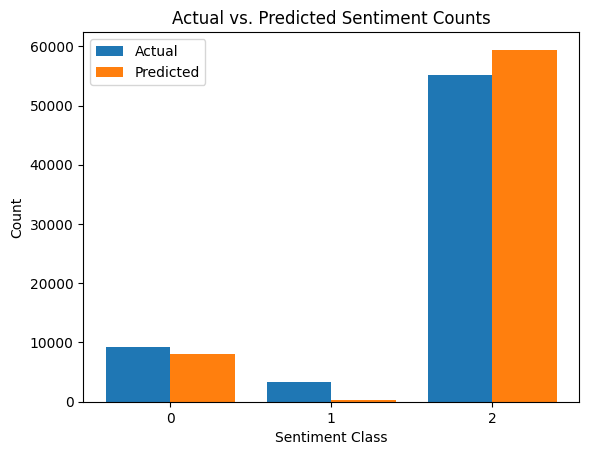

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique classes from the test set
unique_classes = np.unique(np.concatenate((Y_test, Y_predicted_value)))

# Count the occurrences of each class in the actual and predicted values
actual_counts = np.bincount(Y_test)
predicted_counts = np.bincount(Y_predicted_value)

# Make sure both arrays have the same length
max_len = max(len(actual_counts), len(predicted_counts))
actual_counts = np.pad(actual_counts, (0, max_len - len(actual_counts)))
predicted_counts = np.pad(predicted_counts, (0, max_len - len(predicted_counts)))

# Create an array representing the classes
x = np.arange(len(unique_classes))

# Plot the bar chart
plt.bar(x - 0.2, actual_counts[unique_classes], width=0.4, label='Actual', align='center')
plt.bar(x + 0.2, predicted_counts[unique_classes], width=0.4, label='Predicted', align='center')

# Set the labels and title
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Sentiment Counts')
tick_labels = [str(cls) for cls in unique_classes]
plt.xticks(x, tick_labels)
plt.legend()

# Show the plot
plt.show()


## CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
flpk_transformed = pd.read_csv("flpk_transformed.csv")

In [ ]:
flpk_transformed.head(1)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,candes 12 l roompersonal air coolerwhite black...,3999,5,super,great cooler excellent air flow and for this p...,positive


In [ ]:
X = flpk_transformed["Review"]
y = flpk_transformed["Sentiment"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [ ]:
# Convert text data to sequences of integers
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Encode labels into numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [ ]:
# Create a simple CNN model
model = Sequential() #This creates a sequential model, which is a linear stack of layers.
#model.add(Embedding(input_dim=len(vectorizer.get_feature_names()), output_dim=100, input_length=X_train_vec.shape[1]))
model.add(Embedding(input_dim=len(vectorizer.vocabulary_), output_dim=100, input_length=X_train_vec.shape[1])) #The Embedding layer is the first layer of the model. It is used to convert integer-encoded words into dense vectors of fixed size (in this case, 100-dimensional vectors). The input_dim parameter is the size of the vocabulary, and input_length is the length of input sequences.
model.add(Conv1D(128, 5, activation='relu')) #This adds a 1D convolutional layer with 128 filters and a filter size of 5. The activation function used is ReLU (Rectified Linear Unit).
model.add(MaxPooling1D(5))#This adds a 1D convolutional layer with 128 filters and a filter size of 5. The activation function used is ReLU (Rectified Linear Unit).
model.add(Flatten()) #Flattens the input, which is necessary before connecting to densely connected layers.
model.add(Dense(64, activation='relu'))#Two fully connected (dense) layers are added. The first one has 64 units with ReLU activation, and the second one has units equal to the number of classes (labels) with a softmax activation.
model.add(Dense(len(label_encoder.classes_), activation='softmax')) #Softmax is used for multi-class classification as it converts the model's raw output to probabilities.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#The model is compiled with categorical crossentropy loss, the Adam optimizer, and accuracy as the evaluation metric.

In [ ]:
# Train the CNN model
model.fit(X_train_vec.toarray(), y_train_one_hot, epochs=50, batch_size=100)

# Evaluate the model
y_pred = model.predict(X_test_vec)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(report)

Epoch 1/50
1374/1374 [==============================] - 120s 87ms/step - loss: 0.3317 - accuracy: 0.9034
Epoch 2/50
1374/1374 [==============================] - 119s 87ms/step - loss: 0.3103 - accuracy: 0.9109
Epoch 3/50
1374/1374 [==============================] - 119s 87ms/step - loss: 0.3071 - accuracy: 0.9122
Epoch 4/50
1374/1374 [==============================] - 119s 86ms/step - loss: 0.3024 - accuracy: 0.9135
Epoch 5/50
1374/1374 [==============================] - 119s 86ms/step - loss: 0.3001 - accuracy: 0.9144
Epoch 6/50
1374/1374 [==============================] - 118s 86ms/step - loss: 0.2988 - accuracy: 0.9148
Epoch 7/50
1374/1374 [==============================] - 118s 86ms/step - loss: 0.2973 - accuracy: 0.9152
Epoch 8/50
1374/1374 [==============================] - 118s 86ms/step - loss: 0.2966 - accuracy: 0.9154
Epoch 9/50
1374/1374 [==============================] - 118s 86ms/step - loss: 0.2959 - accuracy: 0.9156
Epoch 10/50
1374/1374 [==============================] 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Train the CNN model with history to get training metrics
history = model.fit(X_train_vec.toarray(), y_train_one_hot, epochs=50, batch_size=100, validation_data=(X_test_vec.toarray(), y_test_one_hot))


Epoch 1/50
1374/1374 [==============================] - 145s 104ms/step - loss: 0.3326 - accuracy: 0.9040 - val_loss: 0.3175 - val_accuracy: 0.9093
Epoch 2/50
1374/1374 [==============================] - 136s 99ms/step - loss: 0.3115 - accuracy: 0.9108 - val_loss: 0.3138 - val_accuracy: 0.9099
Epoch 3/50
1374/1374 [==============================] - 136s 99ms/step - loss: 0.3057 - accuracy: 0.9125 - val_loss: 0.3129 - val_accuracy: 0.9103
Epoch 4/50
1374/1374 [==============================] - 135s 99ms/step - loss: 0.3033 - accuracy: 0.9136 - val_loss: 0.3127 - val_accuracy: 0.9101
Epoch 5/50
1374/1374 [==============================] - 135s 98ms/step - loss: 0.3004 - accuracy: 0.9143 - val_loss: 0.3129 - val_accuracy: 0.9103
Epoch 6/50
1374/1374 [==============================] - 135s 99ms/step - loss: 0.2993 - accuracy: 0.9149 - val_loss: 0.3143 - val_accuracy: 0.9097
Epoch 7/50
1374/1374 [==============================] - 135s 98ms/step - loss: 0.2970 - accuracy: 0.9151 - val_loss: 

In [ ]:
# Access training metrics from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print training accuracy over epochs
for epoch, acc, val_acc in zip(range(1, 51), train_accuracy, val_accuracy):
    print(f"Epoch {epoch}: Training Accuracy - {acc}, Validation Accuracy - {val_acc}")



Epoch 1: Training Accuracy - 0.904011070728302, Validation Accuracy - 0.9093421697616577
Epoch 2: Training Accuracy - 0.910788357257843, Validation Accuracy - 0.90993332862854
Epoch 3: Training Accuracy - 0.9124627113342285, Validation Accuracy - 0.9103471636772156
Epoch 4: Training Accuracy - 0.9135982990264893, Validation Accuracy - 0.9101107120513916
Epoch 5: Training Accuracy - 0.9143335223197937, Validation Accuracy - 0.9102880358695984
Epoch 6: Training Accuracy - 0.9148722290992737, Validation Accuracy - 0.9096820950508118
Epoch 7: Training Accuracy - 0.9151270389556885, Validation Accuracy - 0.9101994037628174
Epoch 8: Training Accuracy - 0.9152507781982422, Validation Accuracy - 0.910081148147583
Epoch 9: Training Accuracy - 0.9155492186546326, Validation Accuracy - 0.9099924564361572
Epoch 10: Training Accuracy - 0.9153672456741333, Validation Accuracy - 0.90993332862854
Epoch 11: Training Accuracy - 0.9157021045684814, Validation Accuracy - 0.9096820950508118
Epoch 12: Train

In [ ]:
# Evaluate the model on the test set
#y_pred_probs = model.predict(X_test_vec.toarray())
# y_pred_classes = np.argmax(y_pred_probs, axis=1)
# # Calculate accuracy and print classification report
# accuracy = accuracy_score(y_test_one_hot, y_pred_classes)
# report = classification_report(y_test_one_hot, y_pred_classes)

# print(f"Accuracy: {accuracy}")
# print(report)

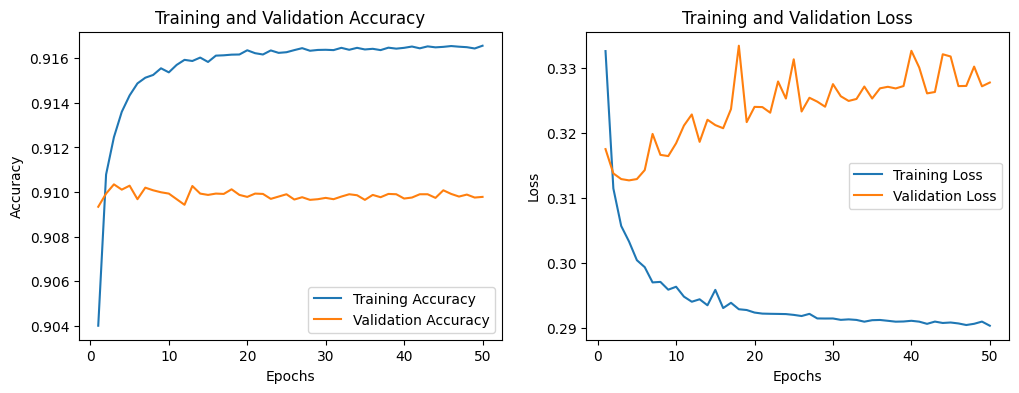

In [ ]:
# Plotting accuracy
# Plotting accuracy vs loss for each epoch
epochs = range(1, 51)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# # Train the CNN model
# model.fit(X_train_vec.toarray(), y_train_one_hot, epochs=10, batch_size=32)

# # Evaluate the model
# y_pred = model.predict(X_test_vec)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_test_classes = np.argmax(y_test_one_hot, axis=1)

# accuracy = accuracy_score(y_test_classes, y_pred_classes)
# report = classification_report(y_test_classes, y_pred_classes)

# print(f"Accuracy: {accuracy}")
# print(report)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Assuming df is your dataset with the columns mentioned
flpk_transformed = pd.read_csv("flpk_transformed.csv")
# Split the data into features (X) and target (y)
X = flpk_transformed[['product_name', 'product_price', 'Rate', 'Review', 'Summary']]
y = flpk_transformed["Sentiment"]

# Use CountVectorizer or TfidfVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X['Review'])  # Use 'Review' column for text data

# Use LabelEncoder to convert the target variable to numerical form
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.33, random_state=40)

In [ ]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [10, 100], #This is the regularization strength.It controls the amount of regularization applied to a model. In the context of logistic regression, regularization is a technique used to prevent overfitting and improve the generalization of the model.
            'solver': ['liblinear','saga', 'sag']
        }
    }
}

#'solver': ['liblinear', 'lbfgs'] Different solvers for optimization

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False) #use 5-fold cross-validation to evaluate the performance of the model for each set of hyperparameters specified
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'cv_results': clf.cv_results_

    })

df_results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params','cv_results'])
print(df_results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

                 model  best_score                       best_params  \
0  logistic_regression    0.909165  {'C': 10, 'solver': 'liblinear'}   

                                          cv_results  
0  {'mean_fit_time': [3.0911905765533447, 3.04277...  


In [ ]:
import pandas as pd

# Assuming cv_results is already defined

# Extract relevant information from cv_results
results_data = {
    'C': cv_results['param_C'],
    'Solver': cv_results['param_solver'],
    'Mean_Test_Score': cv_results['mean_test_score'],
    'Std_Test_Score': cv_results['std_test_score']
}

# Create a DataFrame
results_df = pd.DataFrame(results_data)

# Display the DataFrame
print(results_df)


     C     Solver  Mean_Test_Score  Std_Test_Score
0   10  liblinear         0.909165        0.000536
1   10       saga         0.908655        0.000756
2   10        sag         0.908939        0.000608
3  100  liblinear         0.908277        0.000591
4  100       saga         0.908670        0.000739
5  100        sag         0.909005        0.000599


In [ ]:
df_results

,model,best_score,best_params,cv_results
0,logistic_regression,0.909165,"{'C': 10, 'solver': 'liblinear'}","{'mean_fit_time': [3.070029354095459, 3.265664..."


Best combination of hyperparameters (C and solver) at highest mean test score:
C: 10, Solver: liblinear


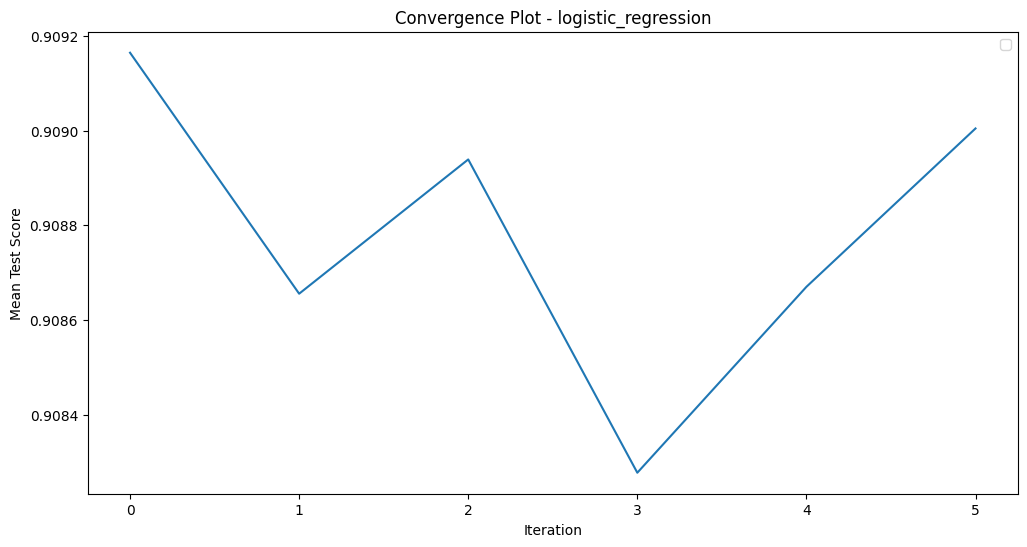

In [ ]:
for index, row in df_results.iterrows():
    model_name = row['model']
    cv_results = row['cv_results']

    # Convert cv_results to a DataFrame
    cv_results_df = pd.DataFrame(cv_results)

    # Find the row where mean test score is highest
    best_iteration_row = cv_results_df.loc[cv_results_df['mean_test_score'].idxmax()]

    # Extract the values of C and solver for the best iteration
    best_C = best_iteration_row['param_C']
    best_solver = best_iteration_row['param_solver']

    print(f"Best combination of hyperparameters (C and solver) at highest mean test score:")
    print(f"C: {best_C}, Solver: {best_solver}")

    # Plot convergence over iterations
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=cv_results_df.index, y='mean_test_score', data=cv_results_df)
    plt.title(f'Convergence Plot - {model_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Test Score')
    plt.legend()
    plt.show()

    # Plot accuracy and loss with hyperparameters
    # fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # sns.heatmap(cv_results_df.pivot('param_C', 'param_solver', 'mean_test_score'), annot=True, fmt=".3f", ax=axes[0])
    # axes[0].set_title(f'Mean Test Score Heatmap - {model_name}')

    # sns.heatmap(cv_results_df.pivot('param_C', 'param_solver', 'rank_test_score'), annot=True, fmt="d", ax=axes[1])
    # axes[1].set_title(f'Rank Heatmap - {model_name}')

    # sns.scatterplot(x='param_C', y='param_solver', hue='mean_test_score', size='mean_test_score', data=cv_results_df, ax=axes[2])
    # axes[2].set_title(f'Scatter Plot - {model_name}')
    # axes[2].set_xlabel('C')
    # axes[2].set_ylabel('Solver')

    plt.show()


In [ ]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10,100,200]
        }
    }
}

rf_scores = []

for model_name, mp in model_params.items():
    rf_clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    rf_clf.fit(X_train, y_train)
    rf_scores.append({
        'model': model_name,
        'best_score': rf_clf.best_score_,
        'best_params': rf_clf.best_params_,
        'cv_results': rf_clf.cv_results_
    })
rf_df = pd.DataFrame(rf_scores, columns=['model', 'best_score', 'best_params','cv_results'])

# Print the updated DataFrame
print(rf_df)

           model  best_score            best_params  \
0  random_forest    0.909573  {'n_estimators': 200}   

                                          cv_results  
0  {'mean_fit_time': [9.052318429946899, 89.09246...  


In [ ]:
rf_scores

[{'model': 'random_forest',
  'best_score': 0.9095726869039821,
  'best_params': {'n_estimators': 200},
  'cv_results': {'mean_fit_time': array([  9.05231843,  89.09246249, 178.66907058]),
   'std_fit_time': array([0.19429239, 0.83729014, 1.36888657]),
   'mean_score_time': array([0.14560165, 1.16730413, 2.34369464]),
   'std_score_time': array([0.00516082, 0.0105981 , 0.02715028]),
   'param_n_estimators': masked_array(data=[10, 100, 200],
                mask=[False, False, False],
          fill_value='?',
               dtype=object),
   'params': [{'n_estimators': 10},
    {'n_estimators': 100},
    {'n_estimators': 200}],
   'split0_test_score': array([0.90867729, 0.90907767, 0.90922327]),
   'split1_test_score': array([0.90885929, 0.90951445, 0.90929606]),
   'split2_test_score': array([0.90824052, 0.90925966, 0.90925966]),
   'split3_test_score': array([0.9104608 , 0.91078838, 0.91093397]),
   'split4_test_score': array([0.90838611, 0.90907767, 0.90915047]),
   'mean_test_score

In [ ]:
rf_clf.best_score_
rf_clf.best_params_
rf_clf.cv_results_

{'mean_fit_time': array([  9.05231843,  89.09246249, 178.66907058]),
 'std_fit_time': array([0.19429239, 0.83729014, 1.36888657]),
 'mean_score_time': array([0.14560165, 1.16730413, 2.34369464]),
 'std_score_time': array([0.00516082, 0.0105981 , 0.02715028]),
 'param_n_estimators': masked_array(data=[10, 100, 200],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.90867729, 0.90907767, 0.90922327]),
 'split1_test_score': array([0.90885929, 0.90951445, 0.90929606]),
 'split2_test_score': array([0.90824052, 0.90925966, 0.90925966]),
 'split3_test_score': array([0.9104608 , 0.91078838, 0.91093397]),
 'split4_test_score': array([0.90838611, 0.90907767, 0.90915047]),
 'mean_test_score': array([0.9089248 , 0.90954357, 0.90957269]),
 'std_test_score': array([0.00079791, 0.00064267, 0.00068234]),
 'rank_test_score': array([3, 2, 1], dty

In [ ]:
for index, row in rf_df.iterrows():
    model_name = row['model']
    cv_results = row['cv_results']

    # Convert cv_results to a DataFrame
    cv_results_df = pd.DataFrame(cv_results)

In [ ]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.052318,0.194292,0.145602,0.005161,10,{'n_estimators': 10},0.908677,0.908859,0.908241,0.910461,0.908386,0.908925,0.000798,3
1,89.092462,0.837290,1.167304,0.010598,100,{'n_estimators': 100},0.909078,0.909514,0.909260,0.910788,0.909078,0.909544,0.000643,2
2,178.669071,1.368887,2.343695,0.027150,200,{'n_estimators': 200},0.909223,0.909296,0.909260,0.910934,0.909150,0.909573,0.000682,1


In [ ]:
import pandas as pd

# Assuming cv_results is already defined

# Extract relevant information from cv_results
rf_results_data = {
    'N_Estimator': cv_results['param_n_estimators'],
    'Mean_Test_Score': cv_results['mean_test_score'],
    'Std_Test_Score': cv_results['std_test_score'],
    'Mean_Fit_Time': cv_results['mean_fit_time'],
    'Std_Fit_Time': cv_results['std_fit_time']
}

# Create a DataFrame
rf_results_df = pd.DataFrame(rf_results_data)

# Display the DataFrame
rf_results_df

,N_Estimator,Mean_Test_Score,Std_Test_Score,Mean_Fit_Time,Std_Fit_Time
0,10,0.908925,0.000798,9.052318,0.194292
1,100,0.909544,0.000643,89.092462,0.837290
2,200,0.909573,0.000682,178.669071,1.368887


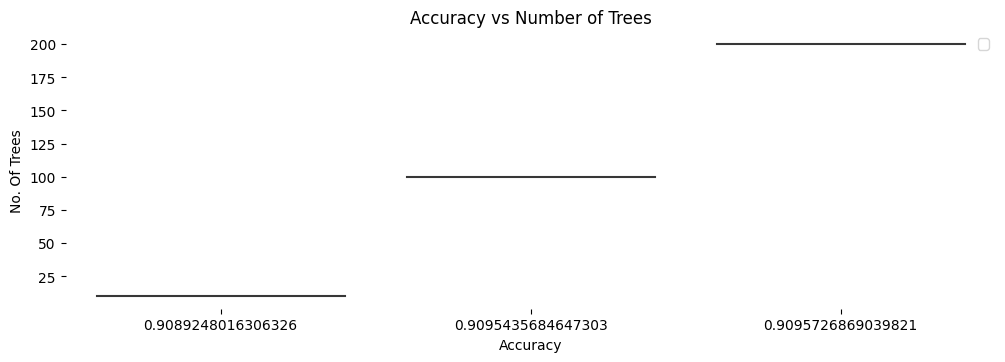

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(rf_results_df['N_Estimator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rf_results_df, x='Mean_Test_Score', y='N_Estimator', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title(f'Accuracy vs Number of Trees')
plt.xlabel('Accuracy')
plt.ylabel('No. Of Trees')
plt.legend()
plt.show()

In [ ]:
model_params = {
    'svm': {
        'model': SVC(),
        'params': {
            'kernel': ['linear','rbf'],
            'C': [1,10, 20]
        }
    }
}

svm_scores = []

for model_name, mp in model_params.items():
    svm_clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    svm_clf.fit(X_train, y_train)
    svm_scores.append({
        'model': model_name,
        'best_score': svm_clf.best_score_,
        'best_params': svm_clf.best_params_,
        'cv_results': svm_clf.cv_results_
    })
svm_df = pd.DataFrame(svm_scores, columns=['model', 'best_score', 'best_params','cv_results'])

In [ ]:
svm_df = pd.DataFrame(svm_scores, columns=['model', 'best_score', 'best_params','cv_results'])

In [ ]:
svm_df

,model,best_score,best_params,cv_results
0,svm,0.908852,"{'C': 1, 'kernel': 'linear'}","{'mean_fit_time': [117.25721192359924, 196.123..."


In [ ]:
import pandas as pd
for index, row in svm_df.iterrows():
    model_name = row['model']
    cv_results = row['cv_results']

	# Extract relevant information from cv_results
    svm_results_data = {
      'C': cv_results['param_C'],
      'Kernel': cv_results['param_kernel'],
      'Mean_Test_Score': cv_results['mean_test_score'],
      'Std_Test_Score': cv_results['std_test_score'],
      'Mean_Fit_Time': cv_results['std_fit_time'],
      'Std_Fit_Time': cv_results['std_fit_time'],
    }

	# Create a DataFrame
svm_results_data_df = pd.DataFrame(svm_results_data)

# Display the DataFrame
svm_results_data_df

,C,Kernel,Mean_Test_Score,Std_Test_Score,Mean_Fit_Time,Std_Fit_Time
0,1,linear,0.908852,0.000436,6.057457,6.057457
1,1,rbf,0.908066,0.000824,1.230979,1.230979
2,10,linear,0.907614,0.000618,12.841232,12.841232
3,10,rbf,0.908226,0.000836,0.970042,0.970042
4,20,linear,0.907156,0.000799,19.478406,19.478406
5,20,rbf,0.908197,0.000822,1.870416,1.870416


<Figure size 1200x800 with 0 Axes>

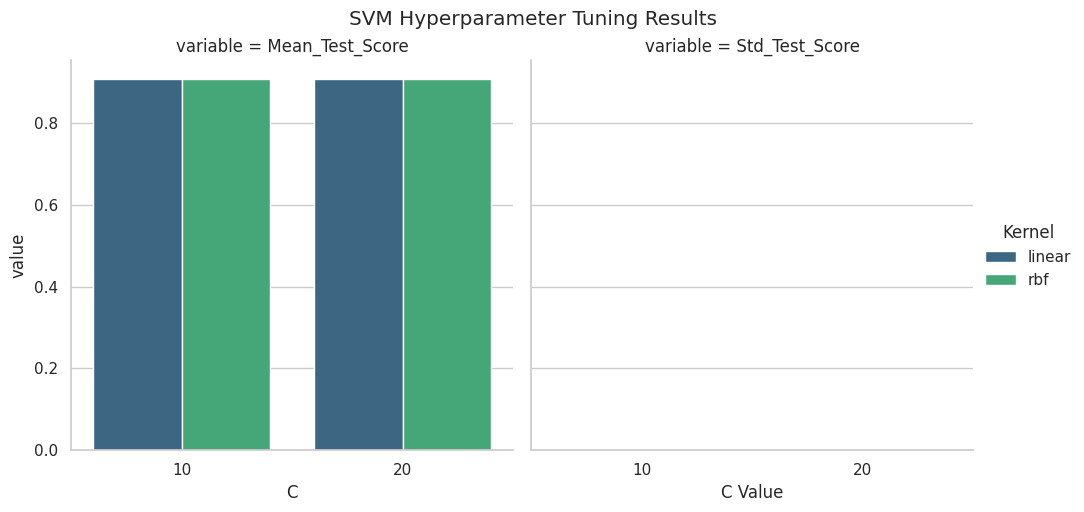

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming svm_results_data_df is already defined
# Melt the DataFrame to make it suitable for plotting
melted_df = pd.melt(svm_results_data_df, id_vars=['C', 'Kernel'], value_vars=['Mean_Test_Score', 'Std_Test_Score'])

# Plot Mean_Test_Score and Std_Test_Score for each combination of C and Kernel
plt.figure(figsize=(12, 8))
sns.catplot(x='C', y='value', hue='Kernel', col='variable', data=melted_df, kind='bar', palette='viridis')
plt.xlabel('C Value')
plt.ylabel('Score')
plt.suptitle('SVM Hyperparameter Tuning Results', y=1.02)
plt.show()


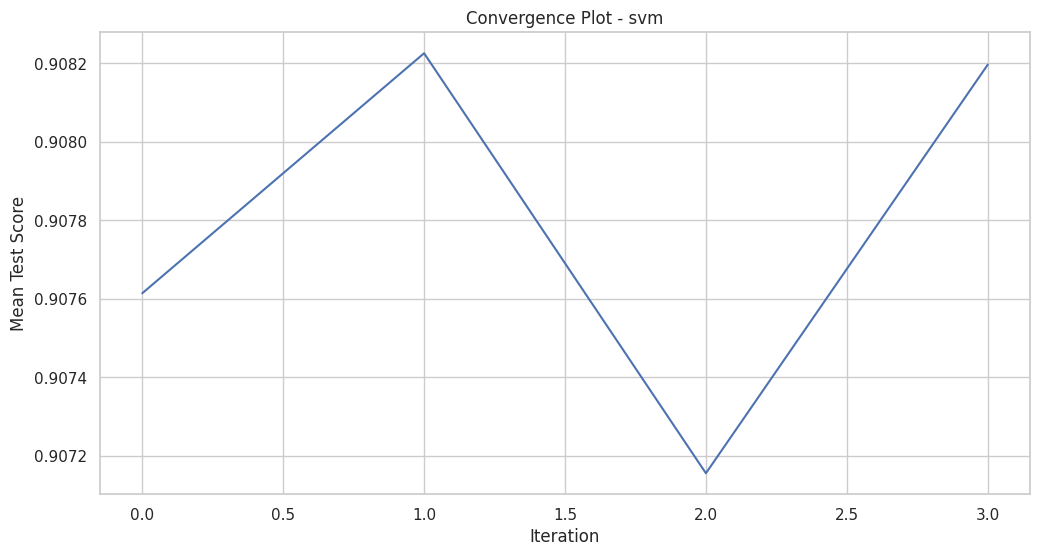

<ipython-input-117-c14072ba20cd>:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'mean_test_score'), annot=True, fmt=".3f")
<ipython-input-117-c14072ba20cd>:22: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'mean_test_score'), annot=True, fmt=".3f")


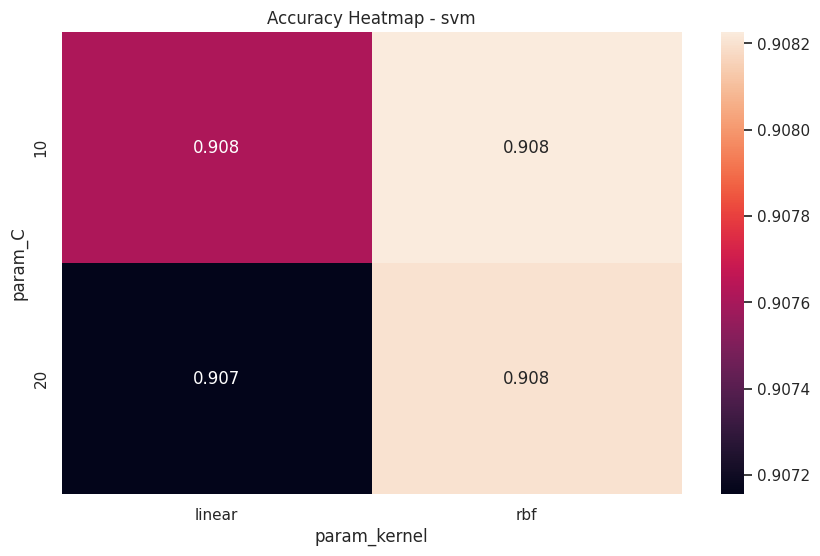

<ipython-input-117-c14072ba20cd>:28: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'rank_test_score'), annot=True, fmt="d")
<ipython-input-117-c14072ba20cd>:28: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'rank_test_score'), annot=True, fmt="d")


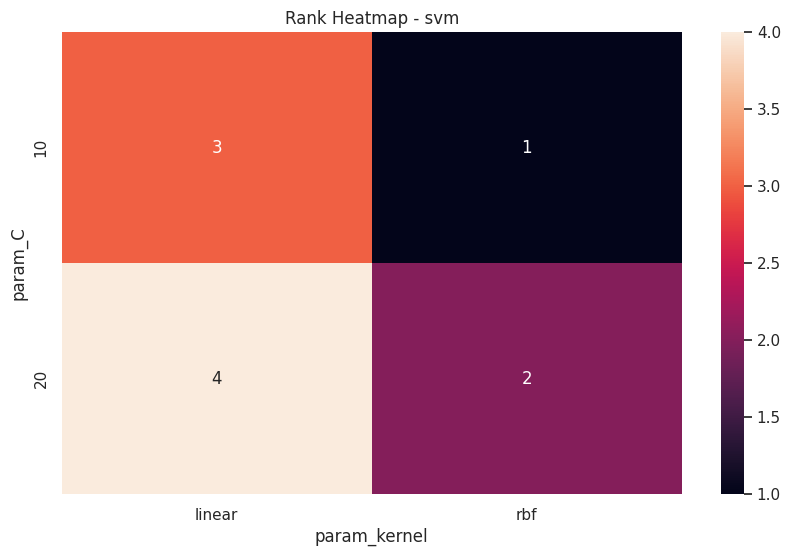

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize convergence, accuracy, and rank
for index, row in svm_df.iterrows():
    model_name = row['model']
    cv_results = row['cv_results']

    # Convert cv_results to a DataFrame
    cv_results_df = pd.DataFrame(cv_results)

    # Plot convergence over iterations
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=cv_results_df.index, y='mean_test_score', data=cv_results_df)
    plt.title(f'Convergence Plot - {model_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Test Score')
    plt.show()

    # Plot accuracy heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'mean_test_score'), annot=True, fmt=".3f")
    plt.title(f'Accuracy Heatmap - {model_name}')
    plt.show()

    # Plot rank heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'rank_test_score'), annot=True, fmt="d")
    plt.title(f'Rank Heatmap - {model_name}')
    plt.show()


In [ ]:
model_value = {'multinomial_NB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 1, 10],
            'fit_prior': [True, False]
        }
    }
}

mb_scores = []
for model_name, mp in model_value.items():
  mb_clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  mb_clf.fit(X_train, y_train)
  mb_scores.append({
      'model': model_name,
      'best_score': mb_clf.best_score_,
      'best_params': mb_clf.best_params_,
      'cv_results': mb_clf.cv_results_
  })

new_df_multinomial_NB = pd.DataFrame(mb_scores, columns=['model', 'best_score', 'best_params','cv_results'])

# # Append the new DataFrame to the existing one
# df_results = df_results.append(new_df_multinomial_NB, ignore_index=True)

# # Print the updated DataFrame
# print(df_results)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Assuming X_train and y_train are already defined

model_value = {'multinomial_NB': {
    'model': MultinomialNB(),
    'params': {
        'alpha': [0.1, 1, 10],
        'fit_prior': [True, False]
    }
}
}
mb_results = []
for model_name, mp in model_value.items():
    mb_clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    mb_clf.fit(X_train, y_train)

    # Store results for each parameter combination
    for i in range(len(mb_clf.cv_results_['params'])):
        mb_results.append({
            'model': model_name,
            'alpha': mb_clf.cv_results_['params'][i]['alpha'],
            'fit_prior': mb_clf.cv_results_['params'][i]['fit_prior'],
            'mean_test_score': mb_clf.cv_results_['mean_test_score'][i],
            'std_test_score': mb_clf.cv_results_['std_test_score'][i],
            'mean_fit_time': mb_clf.cv_results_['mean_fit_time'][i],
            'std_fit_time': mb_clf.cv_results_['std_fit_time'][i],
            'mean_score_time': mb_clf.cv_results_['mean_score_time'][i],
            'std_score_time': mb_clf.cv_results_['std_score_time'][i],
        })
results_df = pd.DataFrame(mb_results)
#results_df
# Visualization: Convergence (mean fit time)
# sns.catplot(x='alpha', y='mean_fit_time', hue='fit_prior', data=results_df, kind='bar')
# plt.title('Convergence (Mean Fit Time)')
# plt.show()

# # Visualization: Loss (mean test score)
# sns.catplot(x='alpha', y='mean_test_score', hue='fit_prior', data=results_df, kind='bar')
# plt.title('Loss (Mean Test Score)')
# plt.show()

# # Visualization: Accuracy (mean test score)
# sns.catplot(x='alpha', y='mean_test_score', hue='fit_prior', data=results_df, kind='bar')
# plt.title('Accuracy (Mean Test Score)')
# plt.show()

,model,alpha,fit_prior,mean_test_score,std_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time
0,multinomial_NB,0.1,True,0.900044,0.000595,0.020429,0.000810,0.002852,0.000097
1,multinomial_NB,0.1,False,0.796084,0.017037,0.020756,0.000492,0.002991,0.000156
2,multinomial_NB,1.0,True,0.899891,0.000960,0.020993,0.000872,0.002880,0.000114
3,multinomial_NB,1.0,False,0.873983,0.000505,0.021674,0.000415,0.002972,0.000056
4,multinomial_NB,10.0,True,0.898872,0.000779,0.021633,0.000387,0.003079,0.000316
5,multinomial_NB,10.0,False,0.887297,0.000381,0.020819,0.000737,0.003064,0.000094


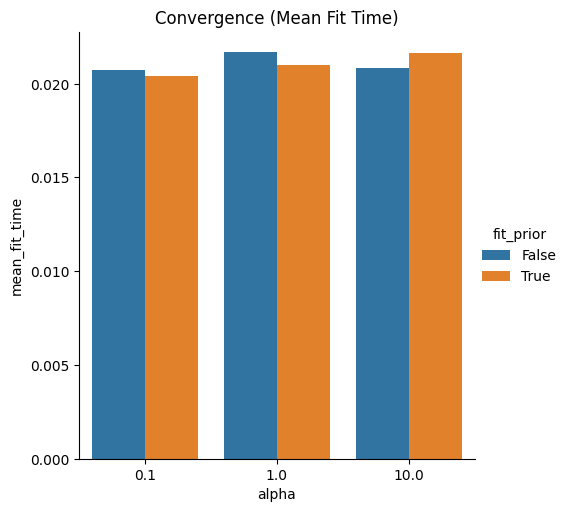

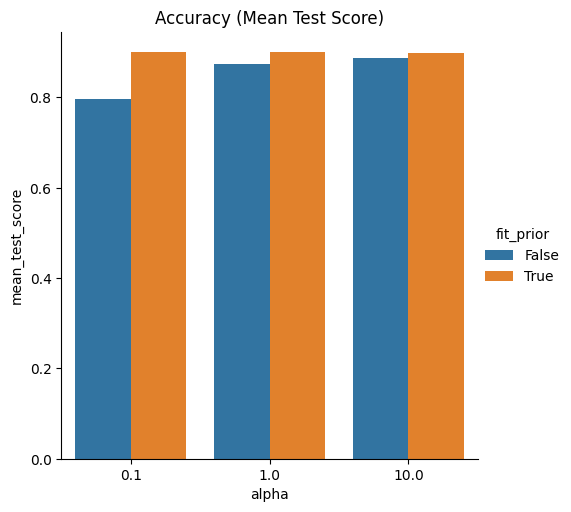

In [ ]:
#results_df
#Visualization: Convergence (mean fit time)
sns.catplot(x='alpha', y='mean_fit_time', hue='fit_prior', data=results_df, kind='bar')
plt.title('Convergence (Mean Fit Time)')
plt.show()

# # Visualization: Loss (mean test score)
# sns.catplot(x='alpha', y='mean_test_score', hue='fit_prior', data=results_df, kind='bar')
# plt.title('Loss (Mean Test Score)')
# plt.show()

# Visualization: Accuracy (mean test score)
sns.catplot(x='alpha', y='mean_test_score', hue='fit_prior', data=results_df, kind='bar')
plt.title('Accuracy (Mean Test Score)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# Assuming df is your dataset with the columns mentioned
flpk_transformed = pd.read_csv("flpk_transformed.csv")
# Split the data into features (X) and target (y)
X = flpk_transformed[['product_name', 'product_price', 'Rate', 'Review', 'Summary']]
y = flpk_transformed["Sentiment"]

# Use LabelEncoder to convert the target variable to numerical form
le = LabelEncoder()
y = le.fit_transform(y)

# Use CountVectorizer or TfidfVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X['Review'])  # Use 'Review' column for text data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.33, random_state=40)

xg_scores = []
model_param_xgboost = {
  'xgboost': {
          'model': XGBClassifier(),
          'params': {
              'learning_rate': [0.01, 0.1, 0.2],
              'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 200]
          }
    }
}

for model_name, mp in model_param_xgboost.items():
  clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  xg_scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

new_df_xgboost = pd.DataFrame(xg_scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
xgg_scores = []

xgg_scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_,
    'cv_results' : clf.cv_results_
})

new_df_xgboost = pd.DataFrame(xgg_scores, columns=['model', 'best_score', 'best_params','cv_results'])

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.6588047 , 0.87779131, 2.1818109 , 0.69002714, 1.78439498,
        2.93168559, 1.47304764, 1.83485026, 4.3767406 , 0.44978137,
        1.34830632, 2.28113585, 0.64742522, 1.2666811 , 3.45762677,
        0.86365352, 2.16172152, 3.63013344, 0.9287147 , 0.87693615,
        2.18871007, 0.65165629, 1.73290606, 2.86240983, 0.83946095,
        2.07763042, 4.02808461]),
 'std_fit_time': array([0.39588505, 0.00894126, 0.93734123, 0.01579327, 0.95698384,
        0.98373421, 0.99287095, 0.03284867, 1.18930841, 0.00569234,
        0.95631175, 0.95449997, 0.01374454, 0.0279835 , 1.31156517,
        0.01694206, 1.00853722, 0.56956235, 0.59360561, 0.01584347,
        0.9587807 , 0.01677522, 0.99776013, 0.84511259, 0.01355373,
        0.66193111, 1.21595763]),
 'mean_score_time': array([0.02408986, 0.04051046, 0.07459211, 0.03207059, 0.05469685,
        0.09953094, 0.04162574, 0.06947737, 0.13459415, 0.02386732,
        0.0446734 , 0.07468896, 0.03096056, 0.05620556, 0.098982

In [ ]:
import pandas as pd
for index, row in new_df_xgboost.iterrows():
    model_name = row['model']
    cv_results = row['cv_results']

    # Assuming cv_results is already defined

    # Extract relevant information from cv_results
    xg_results_data = {
      'learning_rate':cv_results['param_learning_rate'],
      'max_depth':cv_results['param_max_depth'],
      'N_Estimator': cv_results['param_n_estimators'],
      'Mean_Test_Score': cv_results['mean_test_score'],
      'Std_Test_Score': cv_results['std_test_score'],
      'Mean_Fit_Time': cv_results['mean_fit_time'],
      'Std_Fit_Time': cv_results['std_fit_time']
    }

# Create a DataFrame
xg_results_df = pd.DataFrame(xg_results_data)

# Display the DataFrame
xg_results_df

,learning_rate,max_depth,N_Estimator,Mean_Test_Score,Std_Test_Score,Mean_Fit_Time,Std_Fit_Time
0,0.01,3,50,0.838262,0.004004,0.658805,0.395885
1,0.01,3,100,0.822923,0.000764,0.877791,0.008941
2,0.01,3,200,0.822742,0.000507,2.181811,0.937341
3,0.01,5,50,0.845905,0.000537,0.690027,0.015793
4,0.01,5,100,0.847885,0.000925,1.784395,0.956984
5,0.01,5,200,0.856657,0.003796,2.931686,0.983734
6,0.01,7,50,0.851714,0.000986,1.473048,0.992871
7,0.01,7,100,0.878278,0.000659,1.834850,0.032849
8,0.01,7,200,0.898158,0.000275,4.376741,1.189308
9,0.1,3,50,0.889488,0.002100,0.449781,0.005692


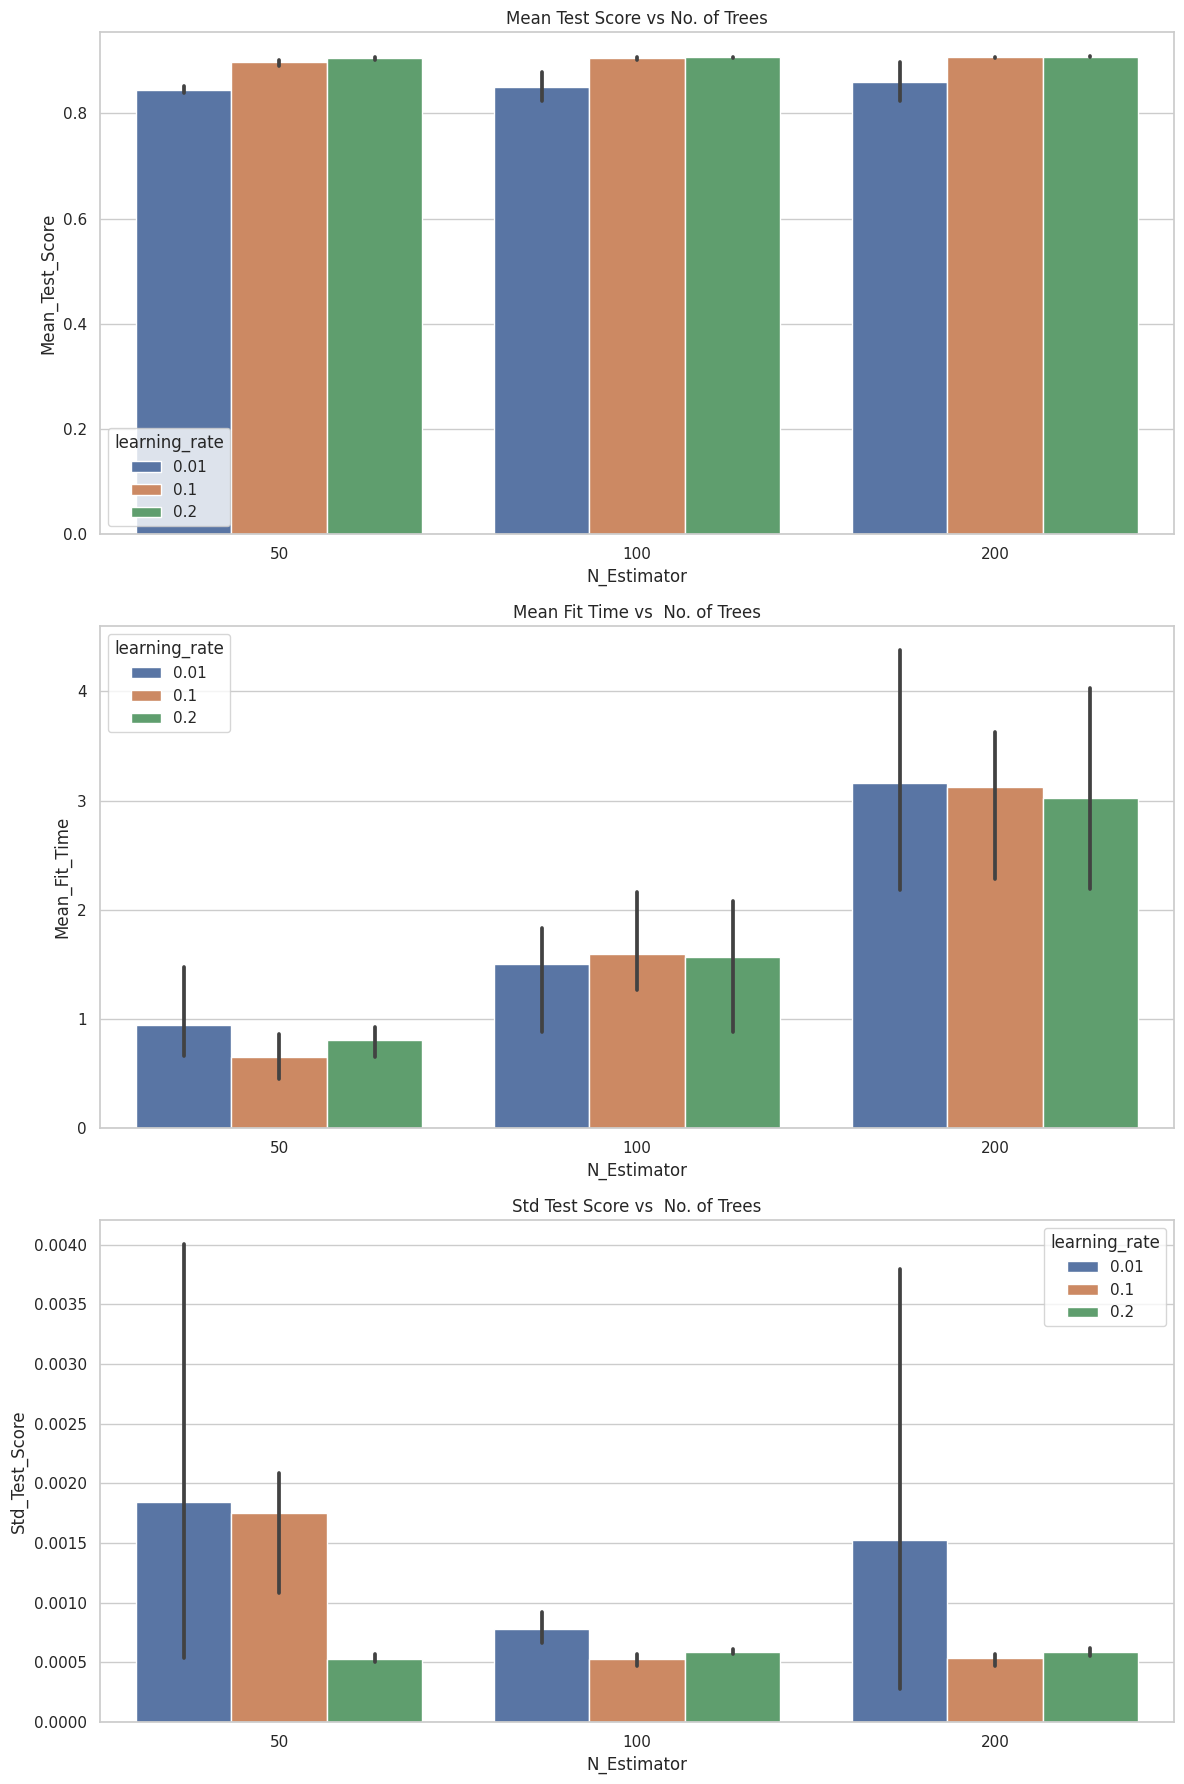

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot Mean_Test_Score
sns.barplot(x='N_Estimator', y='Mean_Test_Score', hue='learning_rate', data=xg_results_df, ax=axes[0])
axes[0].set_title('Mean Test Score vs No. of Trees')

# Plot Mean_Fit_Time
sns.barplot(x='N_Estimator', y='Mean_Fit_Time', hue='learning_rate', data=xg_results_df, ax=axes[1])
axes[1].set_title('Mean Fit Time vs  No. of Trees')

# Plot Std_Test_Score
sns.barplot(x='N_Estimator', y='Std_Test_Score', hue='learning_rate', data=xg_results_df, ax=axes[2])
axes[2].set_title('Std Test Score vs  No. of Trees')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize convergence, accuracy, and rank
for index, row in svm_df.iterrows():
    model_name = row['model']
    cv_results = row['cv_results_']

    # Convert cv_results to a DataFrame
    cv_results_df = pd.DataFrame(cv_results)

    # Plot convergence over iterations
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=cv_results_df.index, y='mean_test_score', data=cv_results_df)
    plt.title(f'Convergence Plot - {model_name}')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Test Score')
    plt.show()

    # Plot accuracy heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'mean_test_score'), annot=True, fmt=".3f")
    plt.title(f'Accuracy Heatmap - {model_name}')
    plt.show()

    # Plot rank heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cv_results_df.pivot('param_C', 'param_kernel', 'rank_test_score'), annot=True, fmt="d")
    plt.title(f'Rank Heatmap - {model_name}')
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming df is your dataset with the columns mentioned
flpk_transformed = pd.read_csv("flpk_transformed.csv")
# Split the data into features (X) and target (y)
X = flpk_transformed[['product_name', 'product_price', 'Rate', 'Review', 'Summary']]
y = flpk_transformed["Sentiment"]

# Use LabelEncoder to convert the target variable to numerical form
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X['Review'], y, test_size=0.33, random_state=40)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(doc.split()) for doc in X_train)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Define embedding dimension and number of classes
embedding_dim = 50  # Replace with your desired value
num_classes = len(np.unique(y))

# Function to create a CNN model
def create_cnn_model(filters=32, kernel_size=3, pool_size=2, dense_units=128, dropout_rate=0.2, learning_rate=0.001, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=num_classes, activation='softmax'))

    if optimizer == 'adam':
        opt = Adam(lr=learning_rate)
    else:
        raise ValueError("Invalid optimizer")

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a scikit-learn estimator
cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=3, batch_size=64, validation_split=0.2, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'cnn__filters': [32, 64],
    'cnn__kernel_size': [2,3],  # Use single integers instead of tuples
    'cnn__pool_size': [2],
    'cnn__dense_units': [128, 256],
    'cnn__dropout_rate': [0.2],
    'cnn__learning_rate': [0.001, 0.01],
    'cnn__optimizer': ['adam']
}

# Create the pipeline with the KerasClassifier
pipeline = Pipeline([('cnn', cnn_classifier)])

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_pad, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pad)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
